### Packets

In [2]:
from GraphSageModel import GNN7L_Sage
from GNNTrain import predict_from_saved_model
from CreateDataset import get_dataset_from_graph
from Paths import PATH_TO_GRAPHS, PATH_TO_MODELS, PATH_TO_RANKINGS
from GDARanking import get_ranking

import heapq
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch
import torch_geometric
from torch_geometric.nn.models import GNNExplainer

torch.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Get number of best positive genes in explanations

In [4]:
disease_Ids = ['C0006142', 'C0009402', 'C0023893', 'C0036341', 'C0376358']

explanation_nodes_ratio=1

# dictionary {disease_Id: {n_positive_nodes: precision}}
precisions = {}

for disease_Id in disease_Ids:
    precisions[disease_Id] = {}

    graph_path = PATH_TO_GRAPHS + 'grafo_nedbit_' + disease_Id + '.gml'
    dataset, G = get_dataset_from_graph(graph_path, disease_Id)

    model_name  = 'GraphSAGE_' + disease_Id + '_40000_0_0005'
    classes     = ['P', 'LP', 'WN', 'LN', 'RN']
    predictions, probabilities, model = predict_from_saved_model(model_name, dataset, classes, plot_results=False, save_to_file=False)

    test_P      = {}
    overall_LP  = {}

    test_mask   = dataset.test_mask
    test_nodes  = []
    test_preds = predictions[test_mask]
    test_probs = probabilities[test_mask]

    i = 0
    for node in G.nodes:
        if test_mask[i]:
            test_nodes.append(node)
        if predictions[i] == 1 and node not in overall_LP:
            overall_LP[node] = probabilities[i][1].item() # take probability of class 1 (LP)
        i += 1

    i = 0
    for node in test_nodes:
        if test_preds[i] == 0 and node not in test_P: #P
            test_P[node] = test_probs[i][0].item() # take probability of class 0 (p)
        i += 1
    
    total_positives = len(test_P)

    for n_positive in range(10, total_positives, 10):
        if n_positive > total_positives-10:
            n_positive = total_positives
        
        ranking, precision = get_ranking(model, dataset, predictions, 
                                            probabilities, disease_Id, n_positive=n_positive,
                                            explanation_nodes_ratio=1, masks_for_seed=5, G=G,
                                            save_ranking_to_file=False)
        
        precisions[disease_Id][n_positive] = precision

[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 36.933
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/10 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 84
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/20 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 79
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/30 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 79
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/40 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 75
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/50 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 78
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/60 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 80
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/70 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 78
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/80 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 77
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/90 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 80
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/100 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 74
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/110 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 75
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/120 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 77
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/130 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 76
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/140 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 76
[i] # of predicted positive genes in test mask: 153
[i] # of predicted overall likely positive genes: 4729


  0%|          | 0/153 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0006142 : 75
[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 35.672
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/10 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 60
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/20 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 53
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/30 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 56
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/40 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 60
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/50 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 65
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/60 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 66
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/70 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 64
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/80 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 62
[i] # of predicted positive genes in test mask: 97
[i] # of predicted overall likely positive genes: 4945


  0%|          | 0/97 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0009402 : 63
[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 32.709
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/10 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 3
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/20 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 2
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/30 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 2
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/40 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 2
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/50 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 2
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/60 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 2
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/70 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 3
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/80 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 3
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/90 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 2
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/100 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 2
[i] # of predicted positive genes in test mask: 117
[i] # of predicted overall likely positive genes: 4950


  0%|          | 0/117 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0023893 : 3
[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 33.269
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/10 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 19
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/20 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 21
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/30 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 21
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/40 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 23
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/50 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 25
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/60 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 25
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/70 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 24
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/80 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 23
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/90 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 23
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/100 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 23
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/110 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 23
[i] # of predicted positive genes in test mask: 125
[i] # of predicted overall likely positive genes: 4764


  0%|          | 0/125 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0036341 : 21
[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 33.19
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/10 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 74
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/20 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 63
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/30 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 65
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/40 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 61
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/50 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 59
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/60 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 63
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/70 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 62
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/80 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 61
[i] # of predicted positive genes in test mask: 91
[i] # of predicted overall likely positive genes: 4975


  0%|          | 0/91 [00:00<?, ?it/s]

# of genes found in the extended dataset for disease C0376358 : 61


### Save to file

In [44]:
df = pd.DataFrame.from_dict(precisions)
df['n_positives'] = df.index
cols = df.columns.to_list()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,n_positives,C0006142,C0009402,C0023893,C0036341,C0376358
10,10,84.0,60.0,3.0,19.0,74.0
20,20,79.0,53.0,2.0,21.0,63.0
30,30,79.0,56.0,2.0,21.0,65.0
40,40,75.0,60.0,2.0,23.0,61.0
50,50,78.0,65.0,2.0,25.0,59.0
60,60,80.0,66.0,2.0,25.0,63.0
70,70,78.0,64.0,3.0,24.0,62.0
80,80,77.0,62.0,3.0,23.0,61.0
90,90,80.0,NaN,2.0,23.0,NaN
100,100,74.0,NaN,2.0,23.0,NaN


In [ ]:
df.to_csv('precision_positive_genes.csv')

### Plot results

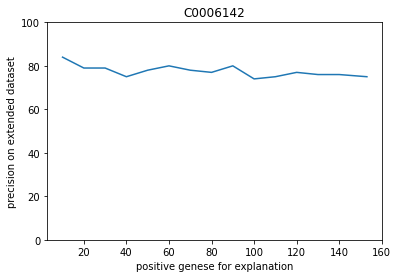

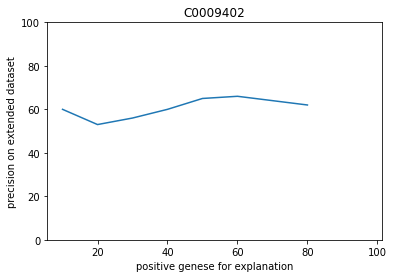

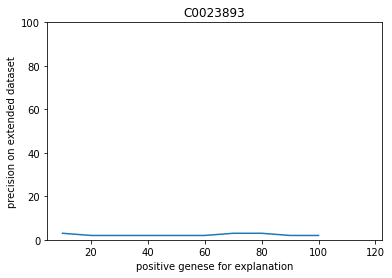

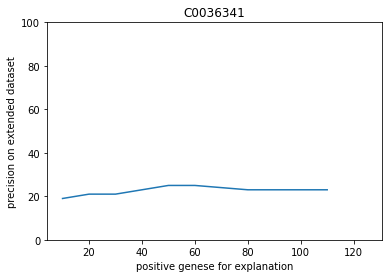

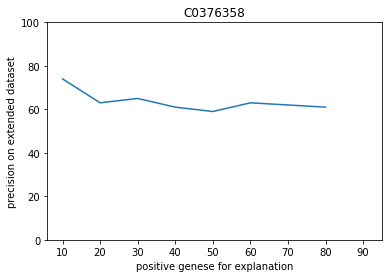

In [6]:
df = pd.read_csv('precision_positive_genes.csv')
cols = df.columns.to_list()

for col in cols[2:]:
    plt.title(str(col))
    plt.xlabel('positive genese for explanation')
    plt.ylabel('precision on extended dataset')
    plt.ylim(0, 100)
    plt.plot(df['n_positives'], df[col])
    plt.show()